## Module 6 Assignment 1: Digit Recognizer
# Requirements
1. Fit a random forest classifier using the full set of explanatory variables and the model training set (csv).
2. Record the time it takes to fit the model and then evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.
3. Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the explanatory variables.
4. Record the time it takes to identify the principal components.
5. Using the identified principal components from step (2), use thecsvto build another random forest classifier.
6. Record the time it takes to fit the model and to evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.
7. Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels.  (Follow the example here if needed: kmeans mnist.pdf   Download kmeans mnist.pdf ).kmeans mnist-2.pdf   Download kmeans mnist-2.pdf  
8. Submit the RF Classifier, the PCA RF, and k-means estimations to Kaggle.com, and provide screen snapshots of your scores as well as your Kaggle.com user name.
9. The experiment we have proposed has a major design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to Kaggle.com. 

#### Report total elapsed time measures for the training set analysis. It is sufficient to run a single time-elapsed test for this assignment. In practice, we might consider the possibility of repeated executions of the relevant portions of the programs, much as the Benchmark Example programs do. Some code that might help you with reporting elapsed total time follows. 

    start=datetime.now()
    rf2.fit(trainimages,labels)
    end=datetime.now()
    print(end-start)

In [1]:
#!conda create -n tensorflow --yes
#!activate tensorflow
#!pip install --upgrade tensorflow

In [2]:
#!conda activate tensorflow
#!conda deactivate tensorflow --> at the end of the notebook

In [3]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#!conda install --yes xgboost
import xgboost

%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler

#stats model
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf

# Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
#!conda install --yes lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

# Model Accuracy
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, mean_poisson_deviance, mean_squared_error 

# Import librairies
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from datetime import datetime 

import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

import tensorflow as tf
print("You are using TensorFlow version", tf.__version__)
#if len(tf.config.list_physical_devices('GPU')) > 0:
#  print("You have a GPU enabled.")
#else:
#  print("Enable a GPU before running this notebook.")
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential  # initial NN
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, InputLayer, BatchNormalization # construct each layer
from tensorflow.keras.layers import Conv2D # swipe across the image by 1
from tensorflow.keras.layers import MaxPool2D, GlobalMaxPool2D # swipe across by pool size
from tensorflow.keras.layers import Flatten, GlobalAveragePooling2D

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau,LearningRateScheduler, TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy, binary_crossentropy, mean_squared_error,sparse_categorical_crossentropy

import pandas as pd
import numpy as np
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline
from tqdm.notebook import trange,tqdm
from IPython.display import Image, display, Markdown, clear_output

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, metrics
from sklearn.decomposition import PCA
from skimage import io

# # tensorflow libraries
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Input,Conv2D,Activation,Dense,Lambda,Flatten,Embedding,PReLU,BatchNormalization,Dropout,MaxPooling2D,GlobalMaxPooling2D,GlobalAveragePooling2D
# from sklearn.model_selection import train_test_split
# from keras.models import Model
# from keras import backend as K

You are using TensorFlow version 2.7.0


In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
train =pd.read_csv('digit-recognizer/train.csv')
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  \
0       0       0        0        0        0        0        0        0   
1       0       0        0        0        0        0        0        0   
2       0       0        0        0        0        0        0        0   
3       0       0        0        0        0        0        0        0   
4       0       0        0        0        0        0        0        0   

   pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        

In [6]:
test = pd.read_csv('digit-recognizer/test.csv')
test.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  \
0       0        0        0        0        0        0        0        0   
1       0        0        0        0        0        0        0        0   
2       0        0        0        0        0        0        0        0   
3       0        0        0        0        0        0        0        0   
4       0        0        0        0        0        0        0        0   

   pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0 

In [7]:
train.isnull().sum().any()

False

In [8]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [9]:
ntrain = train.shape[0]
y_train = train['label'].values
train=train.drop(['label'], axis=1)
train.shape

(42000, 784)

Scalled data:


<AxesSubplot:>

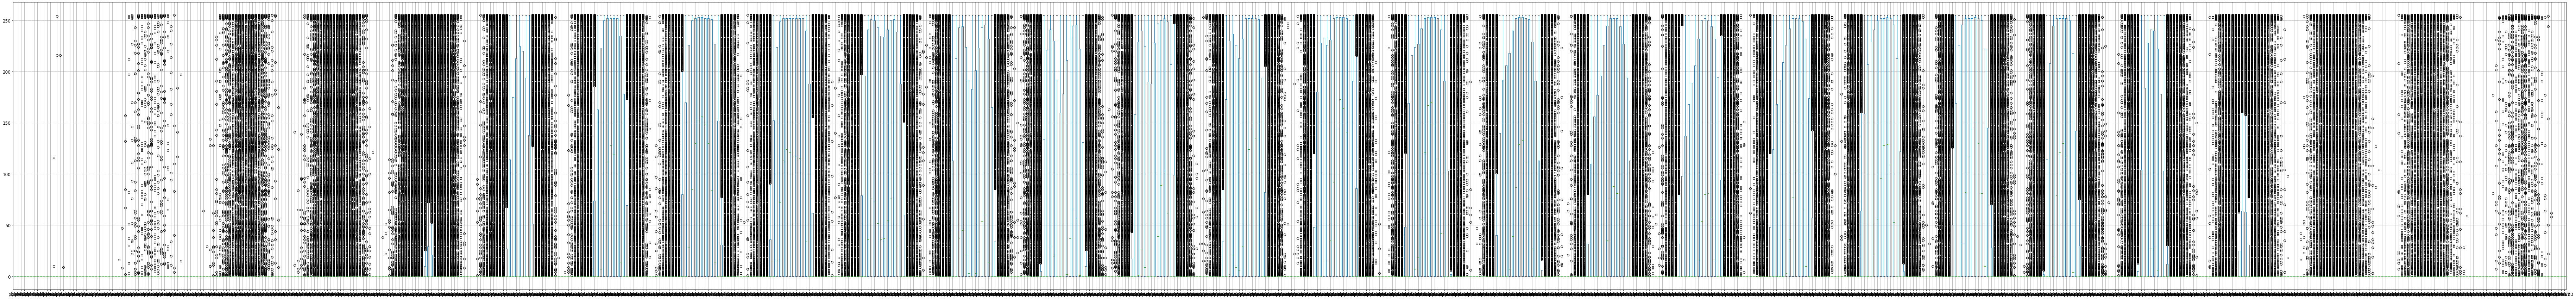

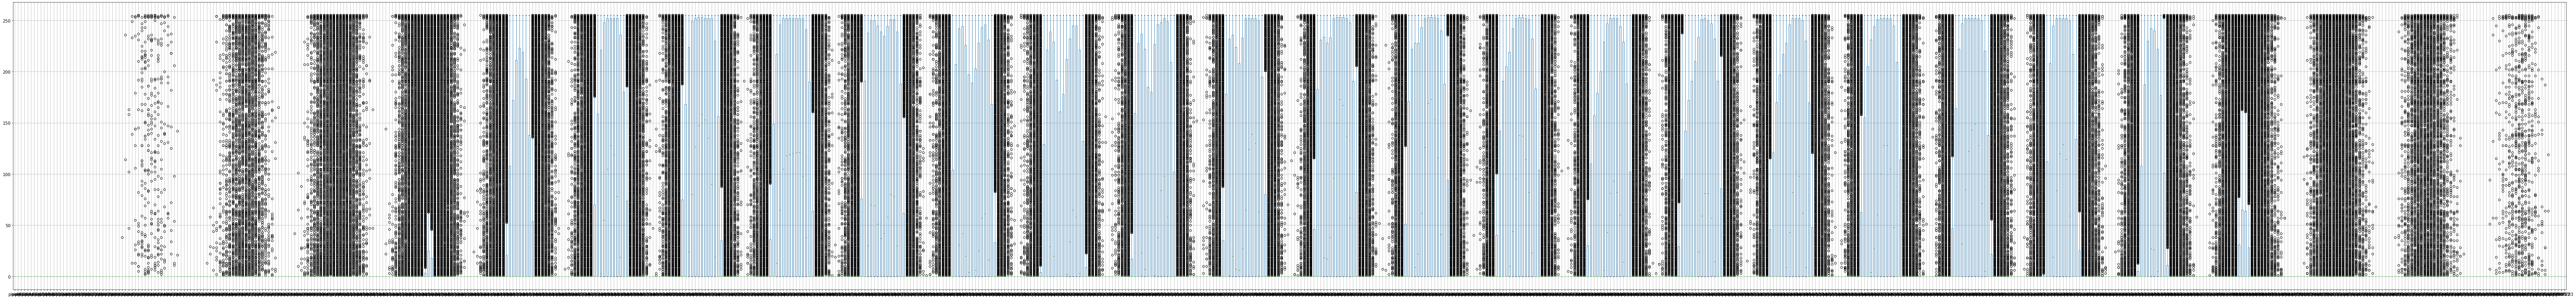

In [10]:
print("Scalled data:")
# Drawing box plots
plt.figure(figsize = (130,15))
train.boxplot()
plt.figure(figsize = (130,15))
test.boxplot()

In [11]:
#train[train.columns]=preprocessing.scale(train[train.columns])
#test[test.columns]=preprocessing.scale(test[test.columns])

In [12]:
# Drawing box plots
# plt.figure(figsize = (130,15))
# train.boxplot()
# plt.figure(figsize = (130,15))
# test.boxplot()

In [13]:
#splitting data in to train and validation sets
train['label'] = y_train
# train-test 80-20 split
train_reg, test_reg = train_test_split(train, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 13)

# Divide into X_train, y_train, X_test, y_test
y_train_1 = train_reg.pop('label')
X_train_1 = train_reg

y_test_1 = test_reg.pop('label')
X_test_1 = test_reg

In [14]:
print(X_train_1.shape)
print(y_train_1.shape)
print(X_test_1.shape)
print(y_test_1.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [15]:
model_columns=X_train_1.columns
model_columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [16]:
#Ramdom forest with entropy and other
rf = RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=200,criterion="entropy")
start=datetime.now()
# Train model
rfc= rf.fit(X_train_1, y_train_1)
end=datetime.now()
print(end-start)
## Performance Matrix on test data set
y_pred_rfc_e = rfc.predict(X_test_1)

0:00:19.553170


In [17]:
# create a KFold object with 10 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 13)
scores = cross_val_score(rfc, X_train_1, y_train_1, scoring='r2', cv=folds)
print("R^2 Scores: ",scores)

# create a KFold object with 10 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 13)
scores = cross_val_score(rfc, X_train_1, y_train_1, scoring='neg_root_mean_squared_error', cv=folds)
print("")
print("RMSE Scores: ",scores)  

R^2 Scores:  [0.90572518 0.92027294 0.91040293]

RMSE Scores:  [-0.87413222 -0.81003748 -0.85971341]


DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features='auto',
                       random_state=1379215494)
n_nodes=6083
[[812   0   1   0   0   1   3   0   8   0]
 [  0 909   2   5   2   1   2   3   0   1]
 [  4   3 774   5   2   0   5   5   7   3]
 [  5   1  14 814   1  11   2   5   9   4]
 [  1   3   1   0 796   0   6   0   4  12]
 [  2   1   2  13   1 764  11   1   4   7]
 [  3   3   1   0   2   5 810   0   0   0]
 [  0   7  10   1   5   0   0 849   2  13]
 [  1   1   2   7   7   2   4   0 799   7]
 [  4   3   5  13   7   2   0   8   6 758]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       825
           1       0.98      0.98      0.98       925
           2       0.95      0.96      0.96       808
           3       0.95      0.94      0.94       866
           4       0.97      0.97      0.97       823
           5       0.97      0.95      0.96       806
           6       0.96      0.98      0.97      

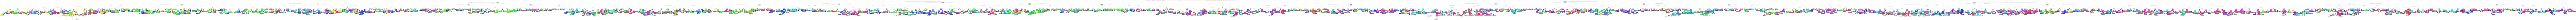

In [18]:
#extract single tree
estimator = rfc.estimators_[5]
print(estimator)
n_nodes = rfc.estimators_[0].tree_.node_count
print("n_nodes={}".format(n_nodes))
print(metrics.confusion_matrix(y_test_1, y_pred_rfc_e))         ## confusion_matrix
print(metrics.classification_report(y_test_1, y_pred_rfc_e))    ## classification_report
#Visualize graph
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = model_columns,
                class_names=['0','1','2','3','4','5','6','7','8','9'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('RandomForestClassifer_entropy.png')
Image(graph.create_png())

In [19]:
test.shape[0]+1

28001

In [20]:
#Predicting on test data
pred=rf.predict(test)

In [21]:
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,test.shape[0]+1),name = "ImageId"),pred],axis = 1)
submission.to_csv("digit_rfc_without_scale.csv",index=False)

<img src="kaggle_score1.png">

In [22]:
#Combining train and test data for PCA
train =pd.read_csv('digit-recognizer/train.csv')
test = pd.read_csv('digit-recognizer/test.csv')
print(train.shape)
print(test.shape)

#Combinig train and test data.
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.label.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['label'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

(42000, 785)
(28000, 784)
all_data size is : (70000, 784)


In [23]:
#Doing PCA
start=datetime.now()
pca = PCA(n_components=0.95, svd_solver='full',whiten=True).fit(all_data)

# Check the time to run the model

all_data_pca = pca.transform(all_data)
end=datetime.now()
print(end-start)
all_data_pca.shape

0:00:03.092863


(70000, 154)

In [24]:
all_data_pca

array([[-1.16853495, -1.37847949,  0.40607488, ..., -0.27379253,
        -0.41167634,  1.61886866],
       [ 2.92403785, -0.811583  , -1.06382622, ..., -0.66770083,
        -0.19746688, -1.08995977],
       [-1.5395353 , -0.5562226 ,  0.17297549, ...,  0.01375746,
        -0.47890512, -0.23760351],
       ...,
       [-0.23938129, -1.30157986, -1.91757754, ...,  0.95541626,
         0.18819553,  0.85887197],
       [-0.08549695,  1.1669248 , -0.7054443 , ...,  0.03054378,
         0.95455141,  0.31988802],
       [ 1.03308898,  0.28607805,  1.78140482, ...,  1.94188546,
         1.2152804 ,  1.76994483]])

In [25]:
#Spilling train and test after PCA
train_pca=all_data_pca[0:ntrain]
print(train_pca.shape)
test_pca=all_data_pca[ntrain:]
print(test_pca.shape)

(42000, 154)
(28000, 154)


In [26]:
#Ramdom forest with entropy and other
rf = RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=200,criterion="entropy")
start=datetime.now()
# Train model
rfc= rf.fit(train_pca, y_train)
end=datetime.now()
print(end-start)
## Performance Matrix on test data set
y_pred_rfc_pca = rfc.predict(test_pca)

0:01:21.550644


In [27]:
# create a KFold object with 10 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 13)
scores = cross_val_score(rfc, train_pca, y_train, scoring='r2', cv=folds)
print("R^2 Scores: ",scores)

# create a KFold object with 10 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 13)
scores = cross_val_score(rfc, train_pca, y_train, scoring='neg_root_mean_squared_error', cv=folds)
print("")
print("RMSE Scores: ",scores)  

R^2 Scores:  [0.86706895 0.87181444 0.86646805]

RMSE Scores:  [-1.05745652 -1.01871768 -1.04584211]


In [28]:
#Final submission data
test_pca.shape[0]+1
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,test.shape[0]+1),name = "ImageId"),pred],axis = 1)
submission.to_csv("digit_rfc_pca.csv",index=False)

<img src="kaggle_score_pca.png">

In [29]:
#K-Means Clustering
train =pd.read_csv('digit-recognizer/train.csv')
test = pd.read_csv('digit-recognizer/test.csv')
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [30]:
ntrain=train.shape[0]
y_train=train['label'].values
X_train=train.drop(['label'], axis=1)
print('Training Data: {}'.format(X_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (42000, 784)
Training Labels: (42000,)


In [31]:
X_train=X_train.values.reshape(-1,28,28)
X_train.shape

(42000, 28, 28)

In [32]:
# # Visulize data
# rows = 5 # defining no. of rows in figure
# cols = 6 # defining no. of colums in figure

# f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

# for i in range(rows*cols): 
#     f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
#     plt.imshow(X_train[i].reshape([28,28]), cmap="Blues") 
#     plt.axis("off")

In [33]:
# # convert each image to 1 dimensional array
# X = X_train.reshape(len(X_train),-1)
# Y = y_train

# # normalize the data to 0 - 1
# X = X.astype(float) / 255.

# print(X.shape)
# print(X[0].shape)

In [34]:
# n_digits = len(np.unique(y_train))
# print(n_digits)

# # Initialize KMeans model

# kmeans = MiniBatchKMeans(n_clusters = n_digits)

# # Fit the model to the training data

# kmeans.fit(X)

# kmeans.labels_

In [35]:
# def infer_cluster_labels(kmeans, actual_labels):
#     inferred_labels = {}
#     for i in range(kmeans.n_clusters):
#         # find index of points in cluster
#         labels = []
#         index = np.where(kmeans.labels_ == i)
#         # append actual labels for each point in cluster
#         labels.append(actual_labels[index])
#         # determine most common label
#         if len(labels[0]) == 1:
#             counts = np.bincount(labels[0])
#         else:
#             counts = np.bincount(np.squeeze(labels))
#             # assign the cluster to a value in the inferred_labels dictionary
#         if np.argmax(counts) in inferred_labels:
#             # append the new number to the existing array at this slot
#             inferred_labels[np.argmax(counts)].append(i)
#         else:
#             inferred_labels[np.argmax(counts)] = [i]
#     return inferred_labels

# def infer_data_labels(X_labels, cluster_labels):
#     # empty array of len(X)
#     predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
#     for i, cluster in enumerate(X_labels):
#         for key, value in cluster_labels.items():
#             if cluster in value:
#                 predicted_labels[i] = key
#     return predicted_labels

# # test the infer_cluster_labels() and infer_data_labels() functions

# cluster_labels = infer_cluster_labels(kmeans, Y)
# X_clusters = kmeans.predict(X)
# predicted_labels = infer_data_labels(X_clusters, cluster_labels)
# print(predicted_labels[:20])
# print(Y[:20])

In [36]:
# # Initialize and fit KMeans algorithm
# kmeans = MiniBatchKMeans(n_clusters = 10)
# kmeans.fit(X)

# # record centroid values
# centroids = kmeans.cluster_centers_

# # reshape centroids into images
# images = centroids.reshape(10, 28, 28)
# images *= 255
# images = images.astype(np.uint8)

# # determine cluster labels
# cluster_labels = infer_cluster_labels(kmeans, Y)

# # create figure with subplots using matplotlib.pyplot
# fig, axs = plt.subplots(2, 5, figsize = (10, 5))
# plt.gray()

# # loop through subplots and add centroid images
# for i, ax in enumerate(axs.flat):
    
#     # determine inferred label using cluster_labels dictionary
#     for key, value in cluster_labels.items():
#         if i in value:
#             ax.set_title('Inferred Label: {}'.format(key))
    
#     # add image to subplot
#     ax.matshow(images[i])
#     ax.axis('off')
    
# # display the figure
# fig.show()

In [37]:
# print(metrics.accuracy_score(y_train, predicted_labels))

In [38]:
X_train=X_train.reshape(len(X_train),-1)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(test)

In [40]:
kmeans = KMeans(n_clusters=10, init='random',n_jobs=-1)

# fitting the k means algorithm on scaled data
kmeans.fit(X_train,y_train)

KMeans(init='random', n_clusters=10, n_jobs=-1)

In [41]:
kmeans.inertia_

25069269.666183177

In [42]:
predicted_labels = kmeans.predict(X_train)
predicted_labels

array([7, 3, 7, ..., 1, 8, 5], dtype=int32)

In [43]:
print(metrics.accuracy_score(y_train, predicted_labels))

0.0419047619047619


In [44]:
# create a KFold object with 10 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 13)
scores = cross_val_score(kmeans, X_train, y_train, scoring='r2', cv=folds)
print("R^2 Scores: ",scores)

# create a KFold object with 10 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 13)
scores = cross_val_score(kmeans, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
print("")
print("RMSE Scores: ",scores)  

R^2 Scores:  [-0.8450484  -1.35919481 -0.5820192 ]

RMSE Scores:  [-4.02037667 -3.95637821 -3.83582735]


In [45]:
#Final Submission
y_pred=kmeans.predict(X_test)

test_pca.shape[0]+1
y_pred = pd.Series(y_pred,name="Label")
submission = pd.concat([pd.Series(range(1,test.shape[0]+1),name = "ImageId"),y_pred],axis = 1)
submission.to_csv("digit_kmeans.csv",index=False)

<img src="kaggel_score2.png">